In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Cleaned-Dataset_Algerian_forest_fires_dataset.csv')

In [4]:
df.drop(['month','day','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [7]:
df['Classes']=df['Classes'].str.strip()

In [8]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [9]:
df['Classes']=np.where(df['Classes']=='not fire',0,1)

In [10]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [11]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
##Independant and Dependant features

X=df.drop('FWI',axis=1)
y=df['FWI']

In [13]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [17]:
y_train.shape,y_test.shape

((182,), (61,))

### Feature Selection based on correlation

In [18]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

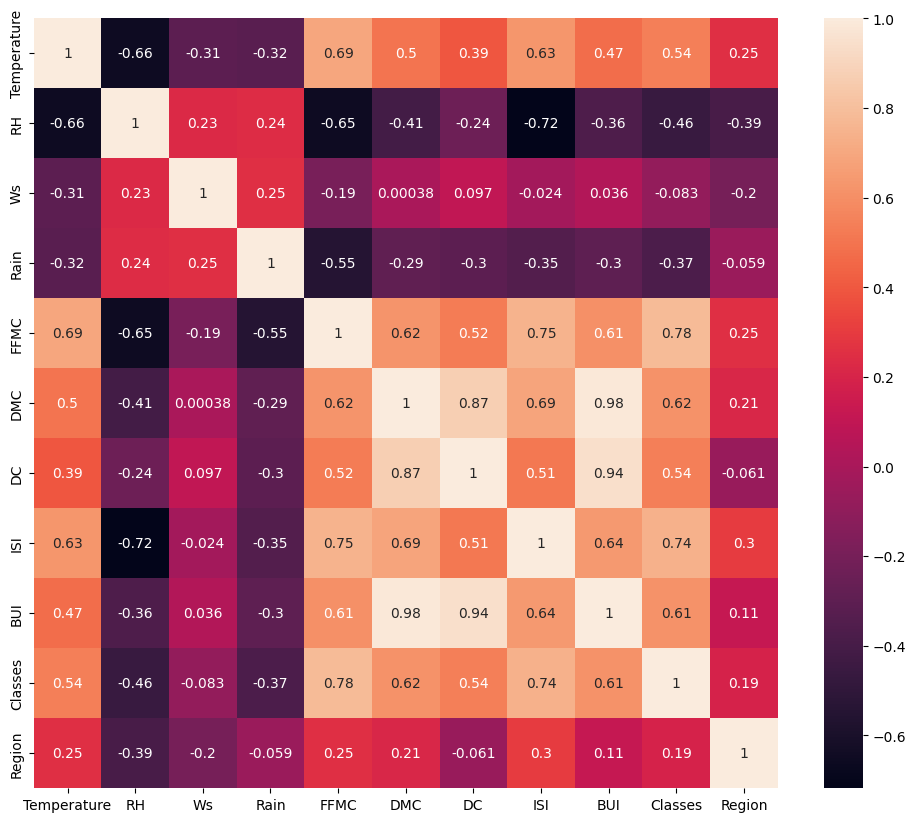

In [19]:
#Check for multicollinearity (independant features shouldnt be very correlated based on some threshold values)

plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [20]:
def correlation(threshold,dataset):
    cor_cols=set()
    cor_matrix=dataset.corr()

    for i in range(len(cor_matrix)):
        for j in range(i):
            if threshold<abs(cor_matrix.iloc[i,j]):
                big_cor_col=cor_matrix.columns[i]
                cor_cols.add(big_cor_col)
    return cor_cols

In [21]:
#Threshold is set by the Domain expert
cor_features=correlation(0.85,X_train)

In [22]:
cor_features

{'BUI', 'DC'}

In [23]:
#Drop features when correlation is more than 0.85
X_train.drop(cor_features,axis=1,inplace=True)
X_test.drop(cor_features,axis=1,inplace=True)

In [24]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature scaling or Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [27]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'x_train_scaled Plot after standard scaler')

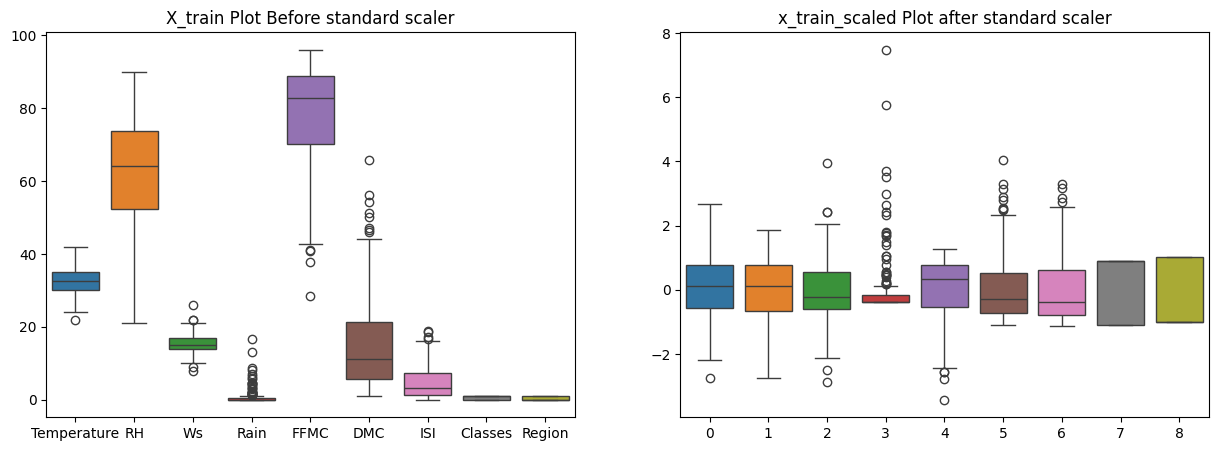

In [28]:
#Box plots

#X_train_scaled and X_train Boxplot to understand the effect of standard scaler
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Plot Before standard scaler')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('x_train_scaled Plot after standard scaler')



### Linear Regression Model

In [29]:
X_train_scaled.shape, y_train.shape

((182, 9), (182,))

mean absolute error:  0.546823646524997
R squared value:  0.9839977157632893


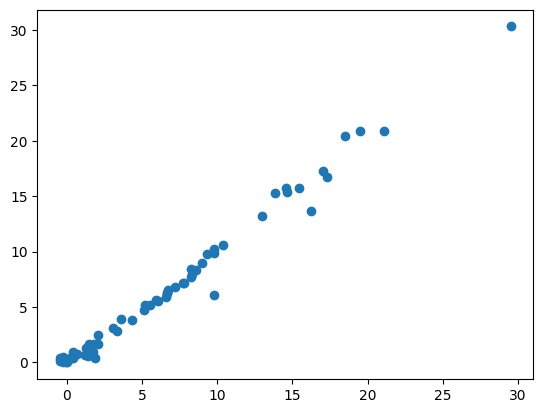

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#training model with training data
model=LinearRegression()
model.fit(X_train_scaled,y_train)

#performance metrics on test data
y_hat=model.predict(X_test_scaled)
mae=mean_absolute_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print("mean absolute error: ",mae)
print("R squared value: ",r2)

plt.scatter(y_hat,y_test)

### Applying Lasso Regression

mean absolute error:  1.133175994914409
R squared value:  0.926474232680569


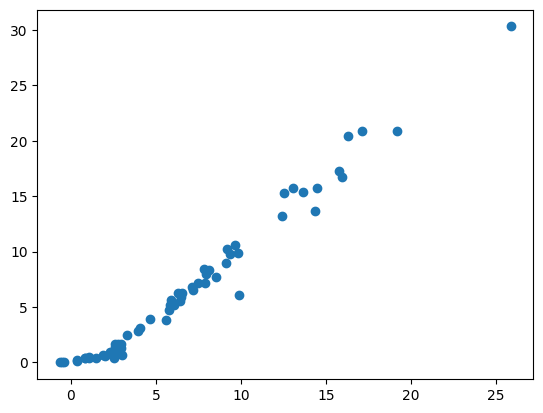

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#training model with training data
model=Lasso()
model.fit(X_train_scaled,y_train)

#performance metrics on test data
y_hat=model.predict(X_test_scaled)
mae=mean_absolute_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print("mean absolute error: ",mae)
print("R squared value: ",r2)

plt.scatter(y_hat,y_test)

### Applying Ridge Reg

mean absolute error:  0.5642305340105691
R squared value:  0.9834070933284212


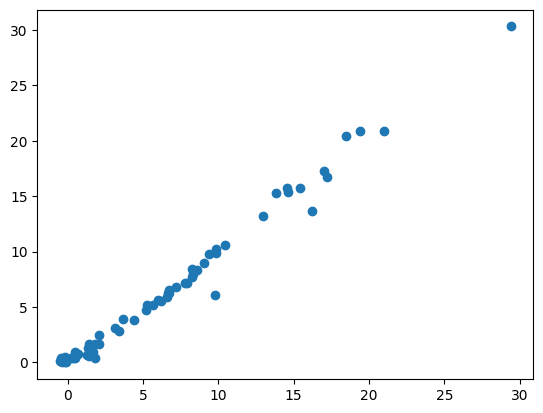

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#training model with training data
ridge_model=Ridge()
ridge_model.fit(X_train_scaled,y_train)

#performance metrics on test data
y_hat=ridge_model.predict(X_test_scaled)
mae=mean_absolute_error(y_hat,y_test)
r2=r2_score(y_hat,y_test)
print("mean absolute error: ",mae)
print("R squared value: ",r2)

plt.scatter(y_hat,y_test)

### Hyperparameter Tuning

#### 1- LassoCV 

In [33]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [34]:
y_hat=lassocv.predict(X_test_scaled)

In [35]:
y_hat

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

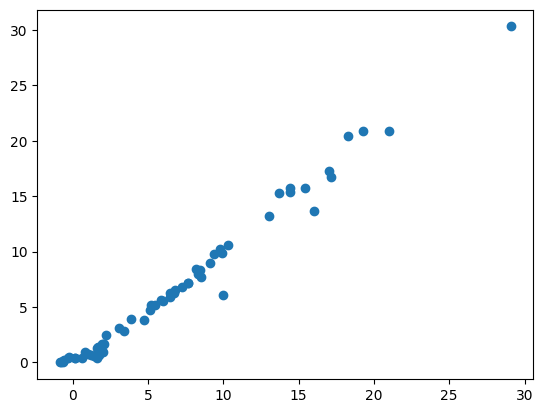

In [36]:
plt.scatter(y_hat,y_test)

In [37]:
lassocv.alpha_, lassocv.alphas_,lassocv.mse_path_

(np.float64(0.05725391318234408),
 array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
        4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
        3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
        2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
        1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
        1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
        0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
        0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
        0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
        0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
        0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
        0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
        0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
        0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
        0.0533

#### 2-RidgeCV

In [38]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_hat=lassocv.predict(X_test_scaled)

In [39]:
y_hat

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [40]:
ridgecv.alpha_ # The single best Alpha value selected by cross-validation.

np.float64(1.0)

In [41]:
ridgecv.alphas #Array of all tested Alpha values.

(0.1, 1.0, 10.0)

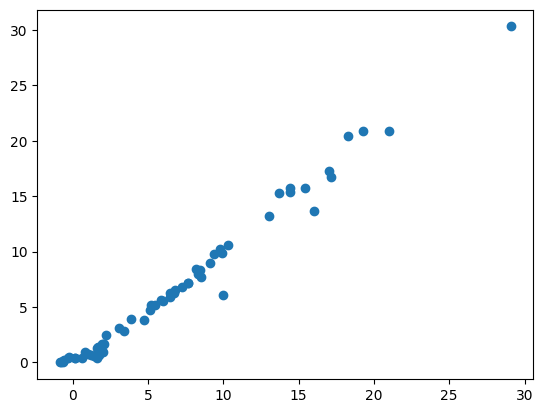

In [42]:
plt.scatter(y_hat,y_test)

#### 3-ElasticNetCV

In [43]:
from sklearn.linear_model import ElasticNetCV
Elastic_cv=ElasticNetCV(cv=5)
Elastic_cv.fit(X_train_scaled,y_train)
y_hat=Elastic_cv.predict(X_test_scaled)

In [44]:
y_hat

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])

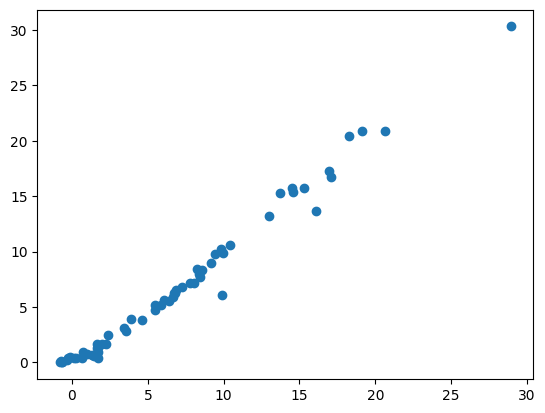

In [45]:
plt.scatter(y_hat,y_test)

In [46]:
#pickle file
import pickle
pickle.dump(ridge_model,open('ridge_model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [48]:
Regression_model=pickle.load(open('ridge_model.pkl','rb'))
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [48]:
Regression_model.predict(X_test)

c:\Users\rushx\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([  5.21756555,  -6.52910659, -38.091741  ,  10.63909699,
         6.58596724, -16.91528283, -41.26148601,  20.09034941,
       -25.86868841, -14.18878643, -36.60581713,  78.67218453,
        18.17375394,  91.24547572,  96.12817916, -26.30392698,
        -5.40954743, -33.69090127,  -3.64815389, -24.66897548,
       -42.49583793, -39.87515573, -19.48542522, -39.77789294,
        84.87371805,  -8.17825927,  -7.61152956,  23.70604696,
       -32.50048011,  13.74185531,  -4.72183275, -38.26484891,
        23.21882652,  75.1741669 , -38.91227953, -36.00178231,
       -45.85889918,  10.0606742 , -32.32561638, -32.36849862,
         5.91167658, -34.95668155,  13.14483307, -36.78984154,
        59.48871166,   8.18613948,  23.68594029, -26.11681914,
        51.85427798, -32.8004546 , 214.59794834,  -1.79332823,
        57.70276853, 115.89996311,  36.56098746, 114.02590508,
       -30.40960391,  15.88146645, -25.61380844,  66.31872915,
       -13.30544931])